# Exploring Data

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns

import io
import urllib.request as req
import zipfile

In [6]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,  # change .replace to .map
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

def tweak_kag(df):
 return (df
    .loc[~df.Q9.isna() & ~df.Q9.str.startswith('I do not', na=False)]  # add na=False
    .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                               'Prefer to self-describe': 'Another'}).astype('category'),
        age=df.Q2.str.slice(0,2).astype('int8'),
        country=df.Q3.apply(limit_countries).astype('category'),
        education=clean_education,
        studies=df.Q5.replace({
                'Computer science (software engineering, etc.)': 'cs',
                'Engineering (non-computer focused)': 'eng',
                'Mathematics or statistics': 'stat'})
            .apply(only_cs_stat_val)
            .astype('category'),
        occupation=df.Q6.apply(limit_occupation).astype('category'),
        years_experience=(df
            .Q8
            .str.replace('+', '')
            .str.split('-', expand=True)
            .iloc[:,0]
            .fillna(-1)
            .astype('int8')),
        salary=lambda df_: df_.Q9
            .str.replace('+','')
            .str.replace(',','')
            .str.replace('500000', '500')
            .str.split('-', expand=True)
            .iloc[:,0]
            .astype(int)
            .mul(1000)
        )
        .loc[:, ['sex', 'age', 'country', 'education',
       'studies', 'occupation', 'years_experience', 'salary']]
    )

url = 'https://github.com/mattharrison/datasets/raw/master/data/kaggle-survey-2018.zip'
fin = req.urlopen(url)

with zipfile.ZipFile(io.BytesIO(fin.read())) as z:
    print(z.namelist())
    kag = pd.read_csv(z.open('multipleChoiceResponses.csv'))
    kag_questions = kag.iloc[0]
    raw = kag.iloc[1:]
df = tweak_kag(raw)

['multipleChoiceResponses.csv', 'freeFormResponses.csv', 'SurveySchema.csv']


/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_49250/3553589535.py:71: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag = pd.read_csv(z.open('multipleChoiceResponses.csv'))


In [7]:
df.dtypes

sex                 category
age                     int8
country             category
education               int8
studies             category
occupation          category
years_experience        int8
salary                 int64
dtype: object

In [8]:
df

,sex,age,country,education,studies,occupation,years_experience,salary
2,Male,30,Another,16,eng,Another,5,10000
3,Female,30,United States of America,18,cs,Data Scientist,0,0
5,Male,22,India,18,stat,Another,0,0
7,Male,35,Another,20,other,Another,10,10000
8,Male,18,India,18,other,Another,0,0
...,...,...,...,...,...,...,...,...
23844,Male,30,Another,18,cs,Software Engineer,10,90000
23845,Male,22,Another,18,stat,Student,0,0
23854,Male,30,Another,20,cs,Another,5,10000
23855,Male,45,Another,20,cs,Another,5,250000


## Categorical Data

In [10]:
# Categorical Data
df.sex.value_counts(dropna=False)

sex
Male       12866
Female      2380
Another      183
Name: count, dtype: int64

<AxesSubplot: ylabel='sex'>

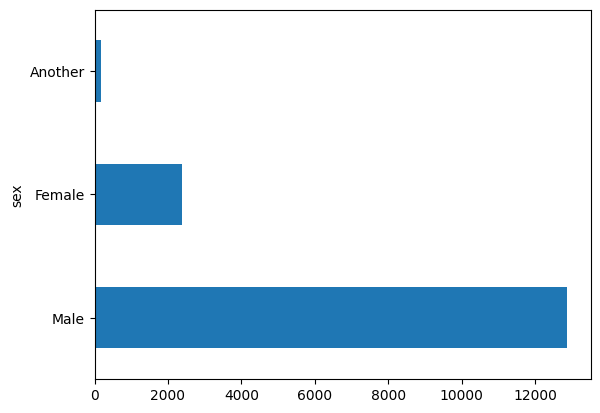

In [12]:
df.sex.value_counts().plot.barh()

## Numerical Data

In [11]:
# Numeric (Ordinal)
df.age.mean()

29.16112515393091

In [13]:
df.age.max()

80

In [14]:
df.age.quantile(.99)

60.0

In [15]:
df.age.quantile([.6, .8])

0.6    30.0
0.8    35.0
Name: age, dtype: float64

In [17]:
df.age.describe()

count    15429.000000
mean        29.161125
std          9.166755
min         18.000000
25%         22.000000
50%         25.000000
75%         35.000000
max         80.000000
Name: age, dtype: float64

<AxesSubplot: ylabel='Frequency'>

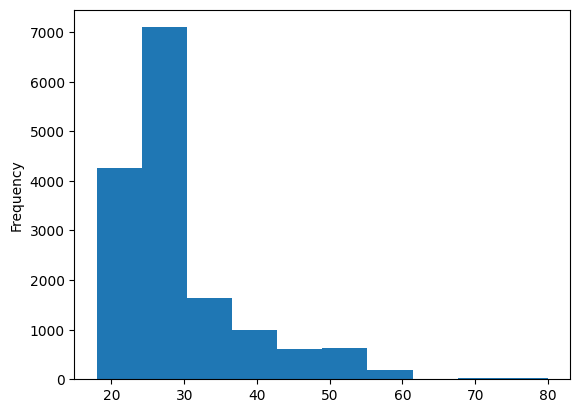

In [18]:
df.age.plot.hist()

<AxesSubplot: >

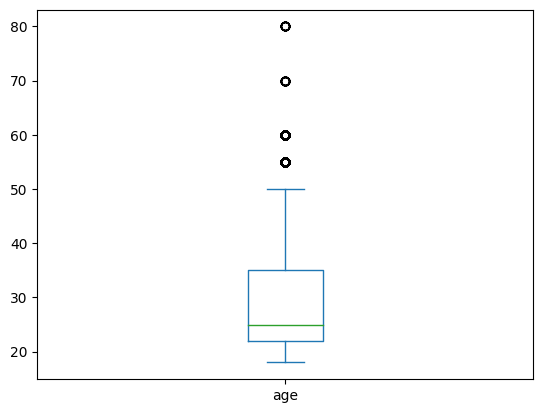

In [19]:
# Are there outliers
df.age.plot.box()

In [20]:
# can also describe a dataframe
df.describe()

,age,education,years_experience,salary
count,15429.000000,15429.000000,15429.000000,15429.000000
mean,29.161125,17.481301,3.762007,43869.661028
std,9.166755,1.796777,5.300731,58272.872725
min,18.000000,11.000000,-1.000000,0.000000
25%,22.000000,16.000000,0.000000,0.000000
50%,25.000000,18.000000,2.000000,20000.000000
75%,35.000000,18.000000,5.000000,70000.000000
max,80.000000,20.000000,30.000000,500000.000000


## Numeric Relationships

In [21]:
# Relationships - Numeric to Numeric
df.age.corr(df.salary)

0.4203678288114516

<AxesSubplot: xlabel='age', ylabel='salary'>

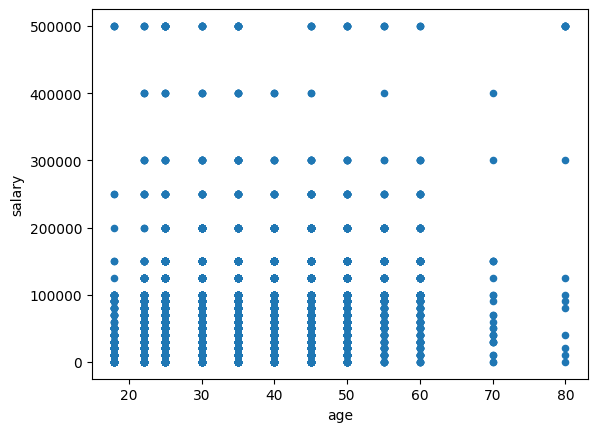

In [22]:
df.plot.scatter(x='age', y='salary')

<AxesSubplot: xlabel='age', ylabel='salary'>

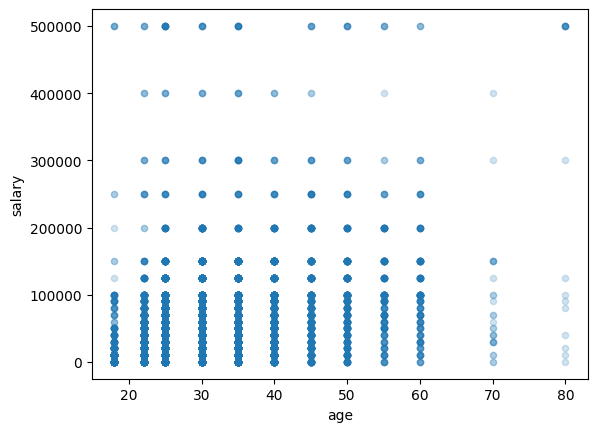

In [23]:
df.plot.scatter(x='age', y='salary', alpha=.2)

<AxesSubplot: xlabel='age', ylabel='salary'>

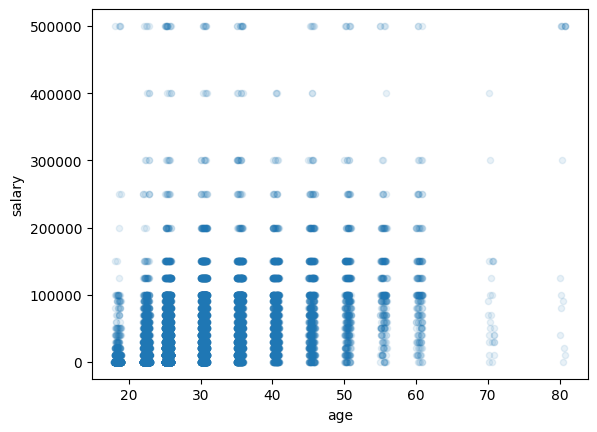

In [33]:
def add_jitter(df_, col, amount=0.9):
    return df_[col] + np.random.random(len(df_)) * amount

(df
 .assign(age=add_jitter(df, 'age'),
         salary=add_jitter(df, 'salary'))
 .plot.scatter(x='age', y='salary', alpha=.1)
)

## Seaborn for Numeric Relationships

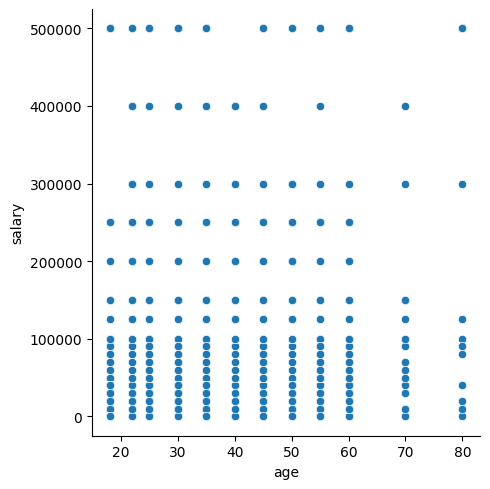

In [35]:
sns.relplot(x='age', y='salary', data=df)

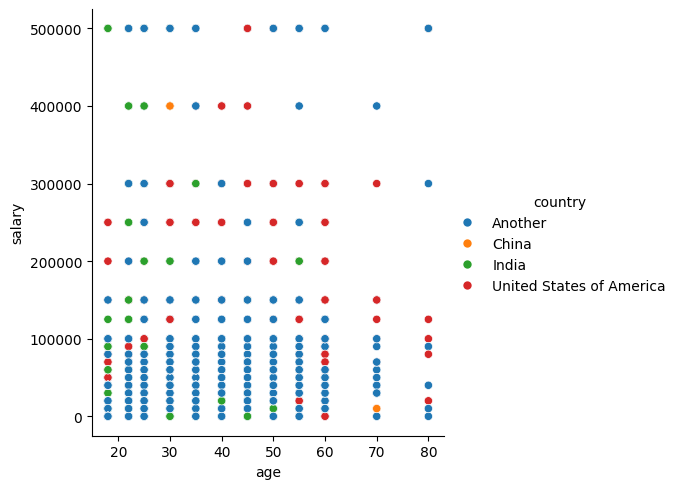

In [36]:
sns.relplot(x='age', y='salary', data=df, hue='country')

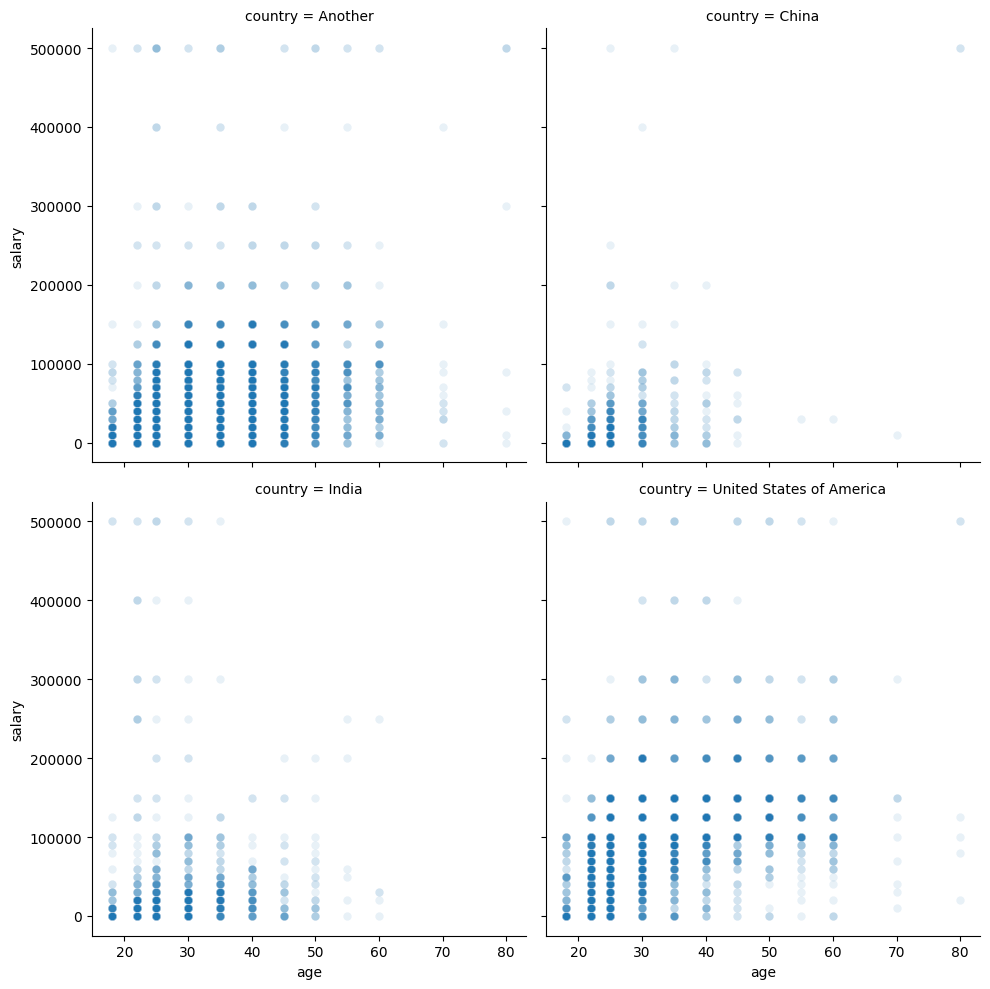

In [37]:
sns.relplot(x='age', y='salary', data=df, col='country', col_wrap=2, alpha=.1)

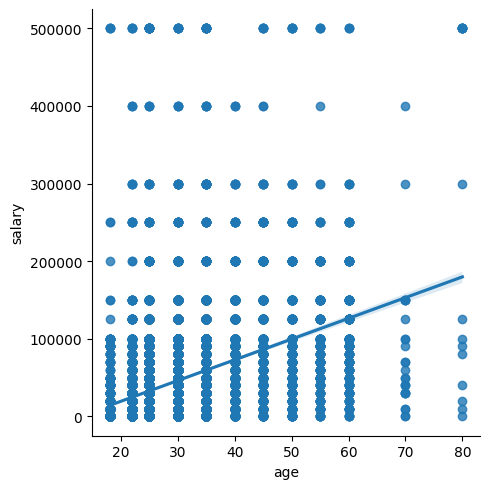

In [38]:
sns.lmplot(x='age', y='salary', data=df)

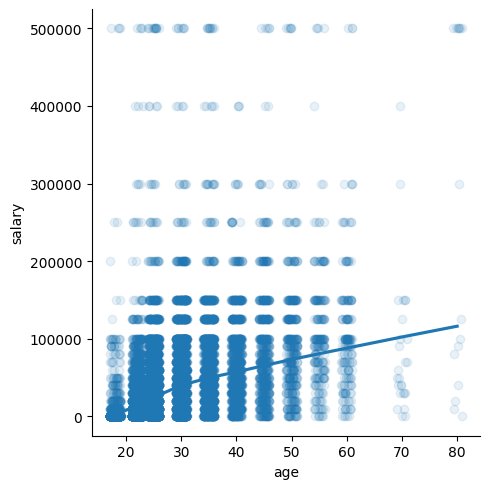

In [39]:
# lower alpha value
sns.lmplot(x='age', y='salary', data=df, x_jitter=1, scatter_kws={'alpha':.1}, lowess=True)

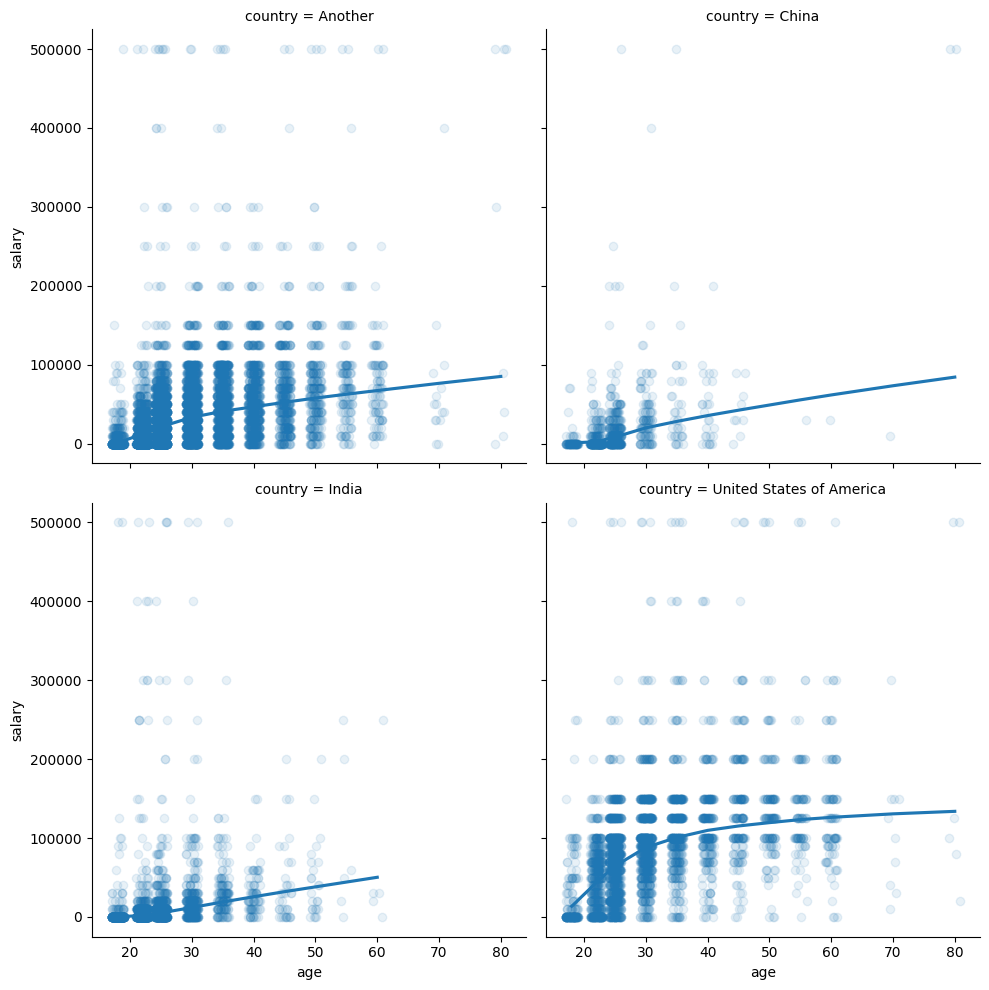

In [40]:
sns.lmplot(x='age', y='salary', data=df, x_jitter=1, scatter_kws={'alpha':.1},
          col='country', col_wrap=2, lowess=True)

/Users/matt/.envs/menv/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


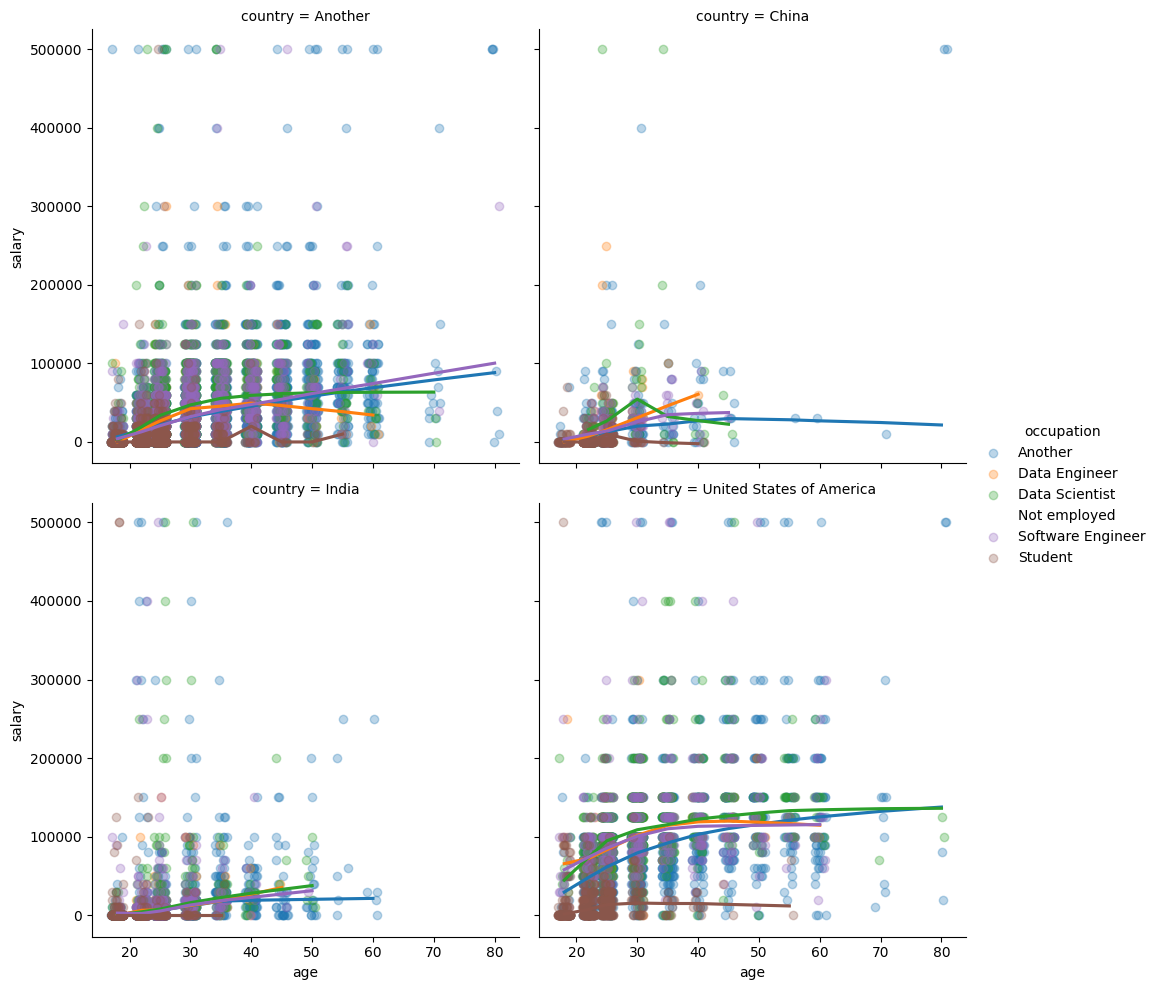

In [41]:
sns.lmplot(x='age', y='salary', data=df, x_jitter=1, scatter_kws={'alpha':.3}, 
           hue='occupation', lowess=True, col='country', col_wrap=2)

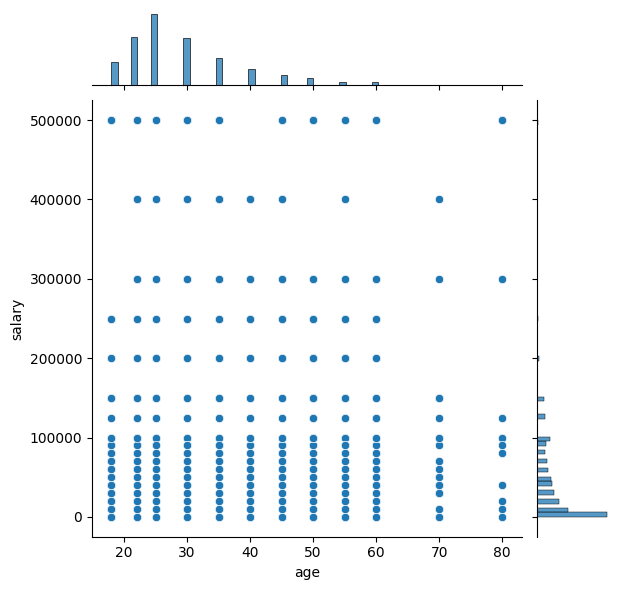

In [42]:
# combine frequency and scatter plot
sns.jointplot(x='age', y='salary', data=df)

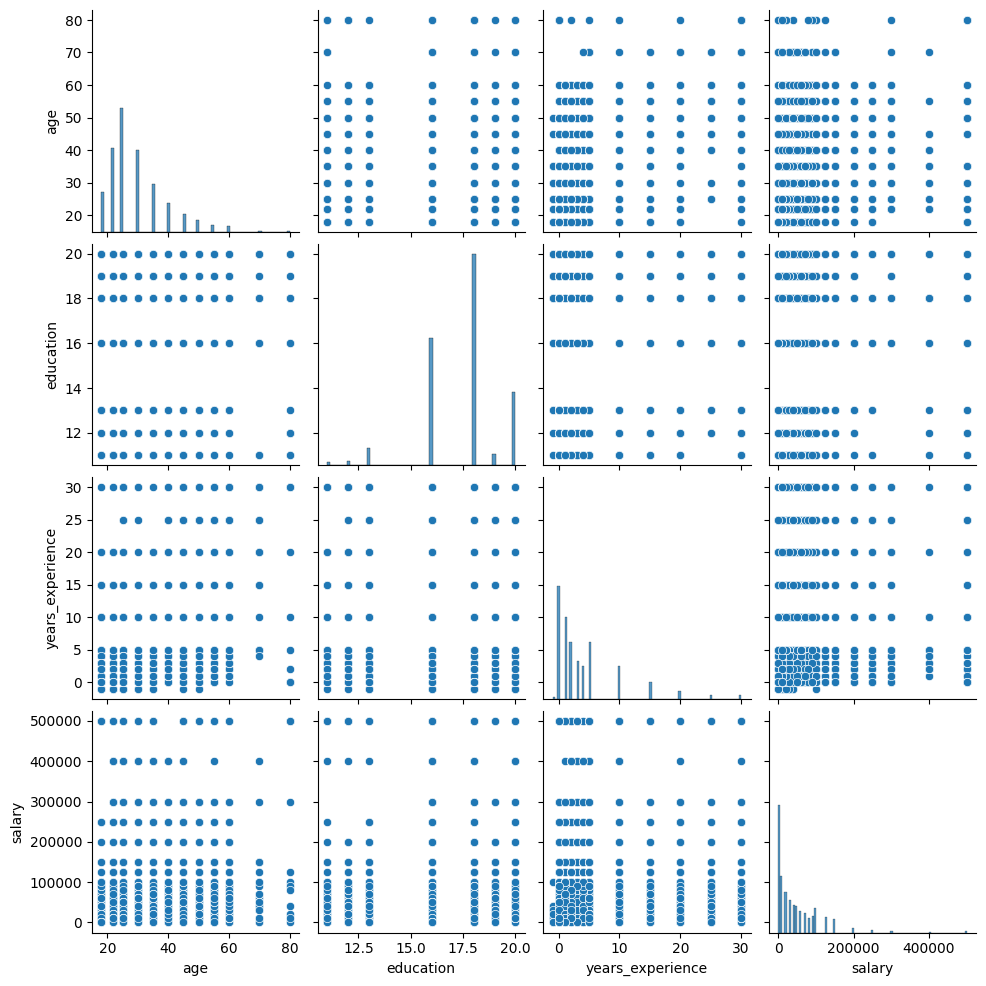

In [43]:
sns.pairplot(df)

## Correlations

In [44]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

ValueError: could not convert string to float: 'Male'

<AxesSubplot: >

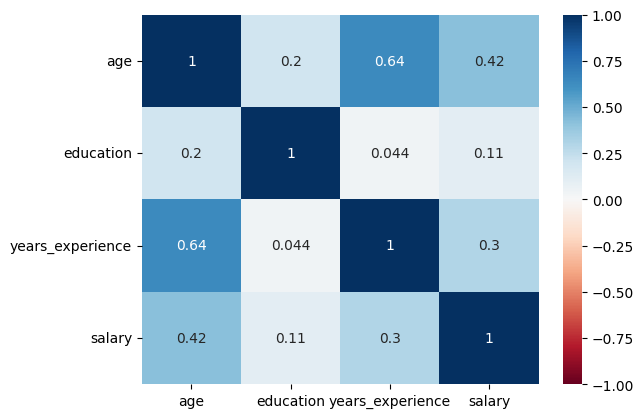

In [46]:
sns.heatmap(
    df
    .select_dtypes('number')
    .corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [48]:
df.select_dtypes('number').corr()

,age,education,years_experience,salary
age,1.000000,0.195973,0.638027,0.420368
education,0.195973,1.000000,0.044320,0.109272
years_experience,0.638027,0.044320,1.000000,0.302237
salary,0.420368,0.109272,0.302237,1.000000


## Categorical vs Numerical

In [49]:
# 2D Categorical vs Continuous
pd.pivot_table(df, values='salary', index='occupation', aggfunc='mean')

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_49250/3335814404.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='salary', index='occupation', aggfunc='mean')


,salary
occupation,
Another,51099.008413
Data Engineer,49007.092199
Data Scientist,58240.997230
Software Engineer,43245.726496
Student,7133.587786


In [50]:
# can also do this with a groupby
(df
 .groupby('occupation')
 [['salary']]
 .mean()
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_49250/3321970175.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('occupation')


,salary
occupation,
Another,51099.008413
Data Engineer,49007.092199
Data Scientist,58240.997230
Not employed,NaN
Software Engineer,43245.726496
Student,7133.587786


In [51]:
# can also do this with a groupby
(df
 .groupby('occupation')
 ['salary']
 .describe()
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_49250/1705527201.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('occupation')


,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
Another,6656.0,51099.008413,62848.649790,0.0,10000.0,30000.0,70000.0,500000.0
Data Engineer,564.0,49007.092199,50387.379859,0.0,10000.0,40000.0,80000.0,300000.0
Data Scientist,3249.0,58240.997230,57559.196074,0.0,20000.0,50000.0,90000.0,500000.0
Not employed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Software Engineer,2340.0,43245.726496,56778.349552,0.0,0.0,20000.0,60000.0,500000.0
Student,2620.0,7133.587786,26225.031721,0.0,0.0,0.0,0.0,500000.0


In [52]:
# 2D Categorical vs Continuous
def custom(ser):
    return ser.quantile(.99)

pd.pivot_table(df, values='salary', index='occupation', 
               aggfunc=['min', 'mean', 'max', custom])

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_49250/1171959609.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='salary', index='occupation',
/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_49250/1171959609.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='salary', index='occupation',
/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_49250/1171959609.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_tab

,min,mean,max,custom
,salary,salary,salary,salary
occupation,,,,
Another,0.0,51099.008413,500000.0,300000.0
Data Engineer,0.0,49007.092199,300000.0,200000.0
Data Scientist,0.0,58240.997230,500000.0,250000.0
Software Engineer,0.0,43245.726496,500000.0,250000.0
Student,0.0,7133.587786,500000.0,98100.0


<AxesSubplot: xlabel='occupation', ylabel='salary'>

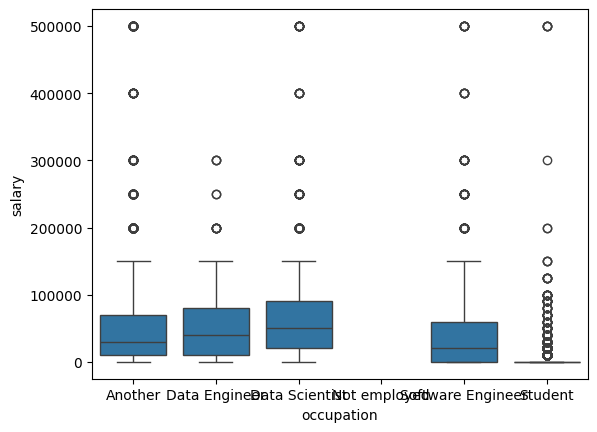

In [53]:
# 2D Categorical vs Continuous Visualization
sns.boxplot(x='occupation', y='salary', data=df)

<AxesSubplot: xlabel='occupation', ylabel='salary'>

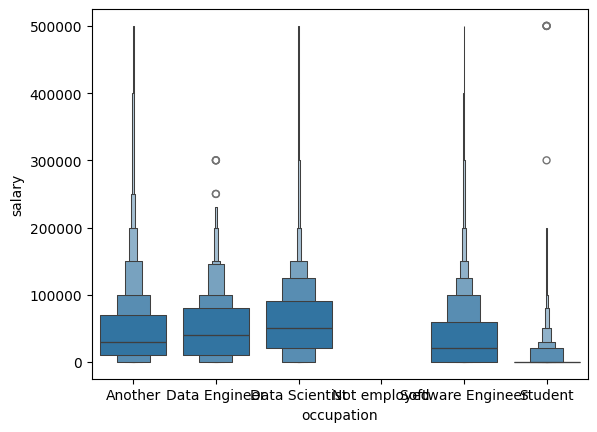

In [54]:
# 2D Categorical vs Continuous
sns.boxenplot(x='occupation', y='salary', data=df)

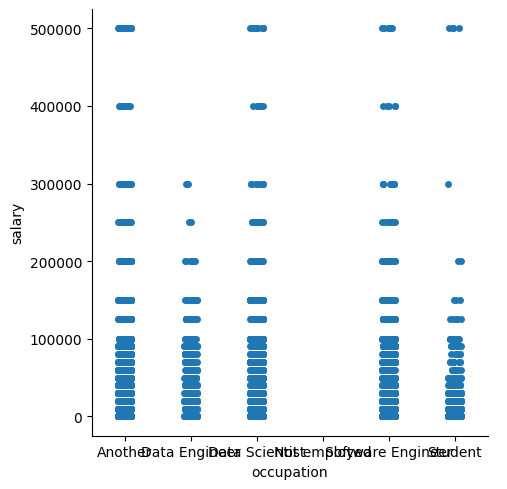

In [55]:
ax = sns.catplot(x='occupation', y='salary', data=df)

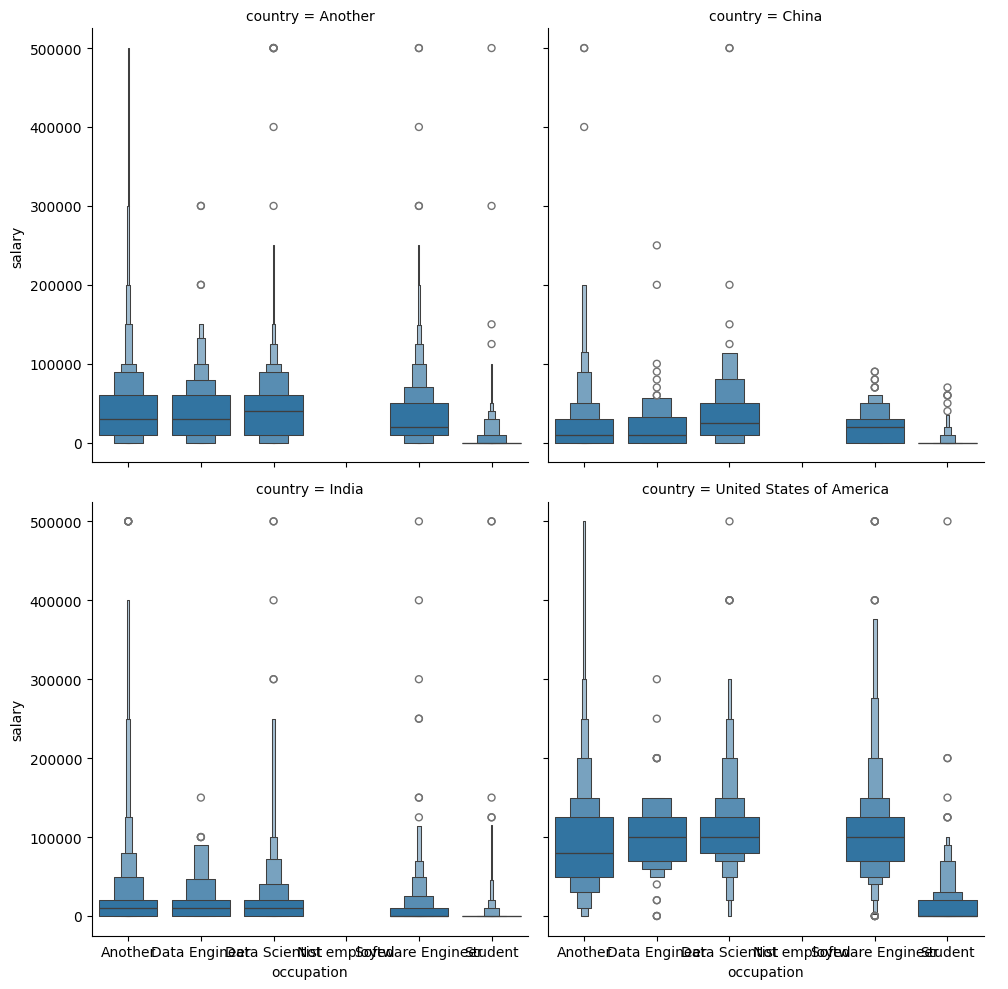

In [56]:
# Can add more dimensions with col, row
ax = sns.catplot(x='occupation', y='salary', data=df, kind='boxen', col='country', col_wrap=2)

## Catetorical vs Categorical

In [57]:
(df
 .pipe(lambda df2: pd.crosstab(df2.country, df2.occupation))
)

occupation,Another,Data Engineer,Data Scientist,Software Engineer,Student
country,,,,,
Another,3958,311,2015,1348,1214
China,270,60,72,115,353
India,837,75,366,477,565
United States of America,1591,118,796,400,488


In [58]:
# percent of occupation by country
(df
 .pipe(lambda df2: pd.crosstab(df2.country, df2.occupation))
 .pipe(lambda df2: df2.div(df2.sum(axis=1), axis=0))
 .mul(100)
)

occupation,Another,Data Engineer,Data Scientist,Software Engineer,Student
country,,,,,
Another,44.743387,3.515713,22.778657,15.238526,13.723717
China,31.034483,6.896552,8.275862,13.218391,40.574713
India,36.077586,3.232759,15.775862,20.560345,24.353448
United States of America,46.890657,3.477748,23.460065,11.788977,14.382552


In [59]:
# percent of country by occupation
(df
 .pipe(lambda df2: pd.crosstab(df2.country, df2.occupation))
 .pipe(lambda df2: df2.div(df2.sum(axis=0), axis=1))
 .mul(100)
)

occupation,Another,Data Engineer,Data Scientist,Software Engineer,Student
country,,,,,
Another,59.465144,55.141844,62.019083,57.606838,46.335878
China,4.056490,10.638298,2.216066,4.914530,13.473282
India,12.575120,13.297872,11.265005,20.384615,21.564885
United States of America,23.903245,20.921986,24.499846,17.094017,18.625954


In [60]:
# add margin
(df
 .pipe(lambda df2: pd.crosstab(df2.country, df2.occupation, margins=True))
)

occupation,Another,Data Engineer,Data Scientist,Software Engineer,Student,All
country,,,,,,
Another,3958,311,2015,1348,1214,8846
China,270,60,72,115,353,870
India,837,75,366,477,565,2320
United States of America,1591,118,796,400,488,3393
All,6656,564,3249,2340,2620,15429


## Stacked Bar Charts

<AxesSubplot: xlabel='country'>

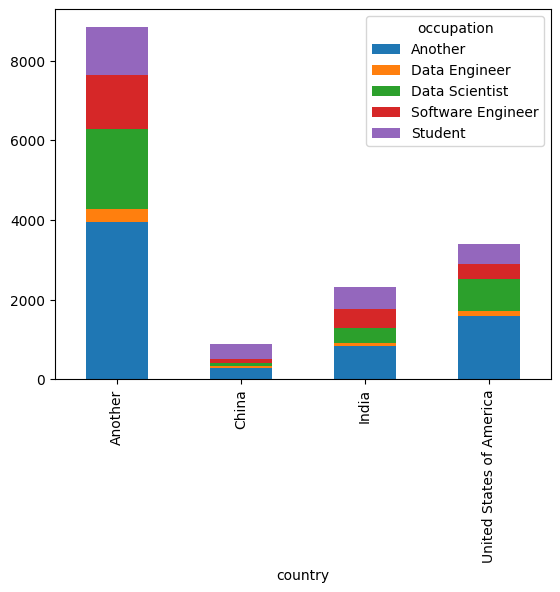

In [61]:
(df
 .pipe(lambda df2: pd.crosstab(df2.country, df2.occupation))
 .plot.bar(stacked=True)
)

<AxesSubplot: xlabel='country'>

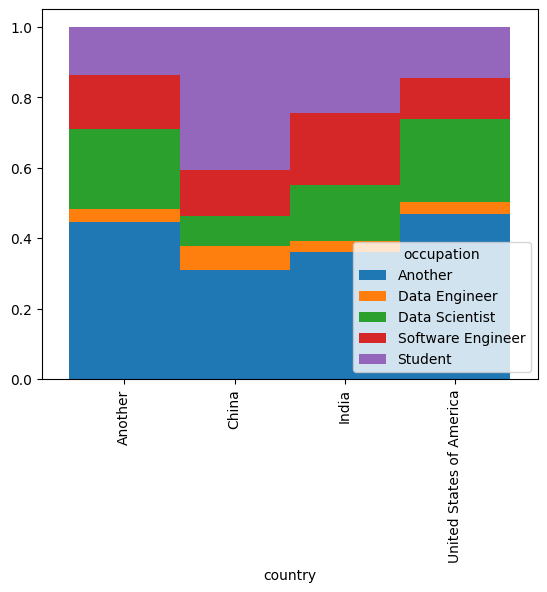

In [62]:
# Normalize
(df
 .pipe(lambda df2: pd.crosstab(df2.country, df2.occupation))
 .pipe(lambda df2: df2.div(df2.sum(axis=1), axis=0))
 .plot.bar(width=1, stacked=True)
)

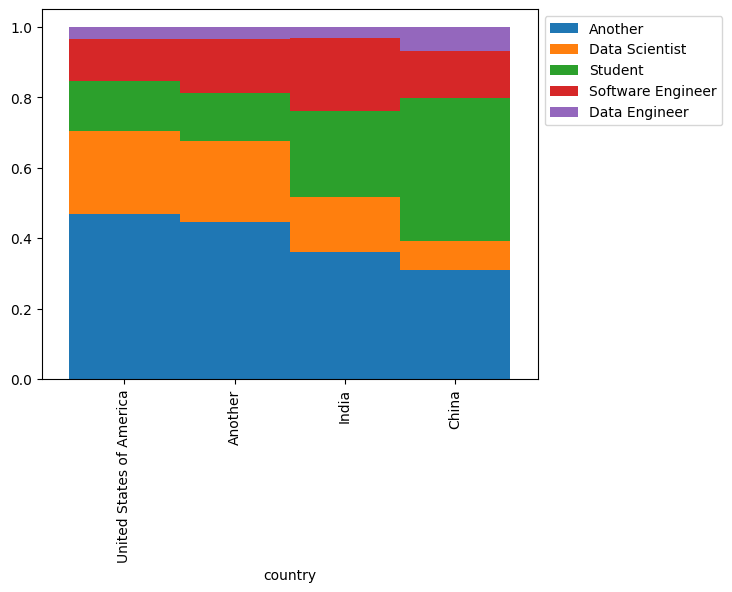

In [63]:
# Normalize with new order
countries = [ 'United States of America', 'Another','India', 'China']
occupations = ['Another', 'Data Scientist', 'Student', 'Software Engineer',
       'Data Engineer']
(df
 .pipe(lambda df2: pd.crosstab(df2.country, df2.occupation))
 .pipe(lambda df2: df2.div(df2.sum(axis=1), axis=0))
 .loc[countries, occupations]
 .plot.bar(width=1, stacked=True)
 .legend(bbox_to_anchor=(1,1))
)

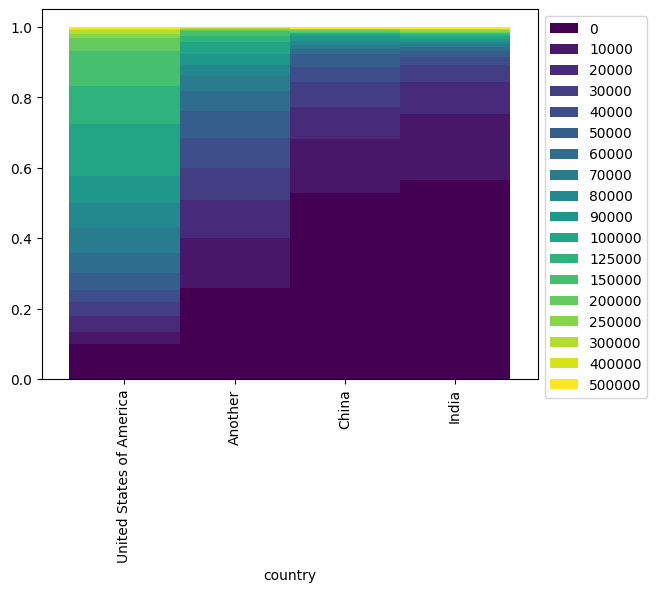

In [64]:
# Use Salary (which is also ordinal category)
countries = [ 'United States of America', 'Another', 'China', 'India']

(df
 .pipe(lambda df2: pd.crosstab(df2.country, df2.salary))
 .pipe(lambda df2: df2.div(df2.sum(1), axis=0))
 .loc[countries]
 .plot.bar(width=1, stacked=True, cmap='viridis')
 .legend(bbox_to_anchor=(1,1))
)

In [65]:
# Use Salary (which is also ordinal category)
countries = [ 'United States of America', 'Another', 'China', 'India']

(df
 .pipe(lambda df2: pd.crosstab(df2.country, df2.salary))
 .pipe(lambda df2: df2.div(df2.sum(1), axis=0))
 .loc[countries]
 .cumsum(axis=1)
 .T
)

country,United States of America,Another,China,India
salary,,,,
0,0.099617,0.258874,0.528736,0.564655
10000,0.134984,0.399842,0.682759,0.752586
20000,0.180371,0.507461,0.773563,0.843103
30000,0.218980,0.599480,0.844828,0.891379
40000,0.251989,0.685395,0.887356,0.915517
50000,0.300619,0.762831,0.924138,0.931466
60000,0.358974,0.818336,0.936782,0.943966
70000,0.433245,0.863441,0.948276,0.950862
80000,0.501326,0.891702,0.960920,0.956897


In [66]:
(df
 .groupby('country')
 ['salary']
 .quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])
 .unstack()
 .T
 .rename_axis(index='Salary Quantile', columns='Country Salary')
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_49250/2178760161.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('country')


Country Salary,Another,China,India,United States of America
Salary Quantile,,,,
0.1,0.0,0.0,0.0,10000.0
0.2,0.0,0.0,0.0,30000.0
0.3,10000.0,0.0,0.0,50000.0
0.4,20000.0,0.0,0.0,70000.0
0.5,20000.0,0.0,0.0,80000.0
0.6,40000.0,10000.0,10000.0,100000.0
0.7,50000.0,20000.0,10000.0,100000.0
0.8,60000.0,30000.0,20000.0,125000.0
0.9,90000.0,50000.0,40000.0,150000.0
